In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from utils_func import get_catagorical
from sklearn.preprocessing import KBinsDiscretizer

In [218]:
train_x = pd.read_csv('data/classificaition_train_x.csv')
train_y = pd.read_csv('data/classificaition_train_y.csv')
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')
train = pd.concat([train_x, train_y], axis = 1)


In [219]:
train = pd.concat([train_x, train_y], axis = 1)
catags = []
for col in list(train.columns):
    if(type(train[col][0])==str):
        catags.append(col)
cols = list(train.columns)
quant = [i for i in cols if i not in catags]

In [220]:
def encoder(df, catags):
    temp = df.copy()
    enc = preprocessing.LabelEncoder()
    
    for col in catags:
        temp[col] = enc.fit_transform(temp[col])
    return temp;

In [221]:
target = train.copy()
sns.set(style="ticks", color_codes=True)


In [222]:
# ** Remove unknown or unsignificant values**
# Questionable f7 f12
remove = [('f1', 'c11'), ('f3', 'c1'), ('f7', 'c2'), ('f9', 'c3'), ('f12', 'c2')]
for r in remove:
    target = target[target[r[0]] != r[1]]

In [236]:
target = encoder(target, catags) 
target.info()
target = target.apply(pd.to_numeric)
target

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23112 entries, 2 to 26359
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      23112 non-null  int64  
 1   f2      23112 non-null  int64  
 2   f3      23112 non-null  int64  
 3   f4      23112 non-null  int64  
 4   f5_dis  23112 non-null  int64  
 5   f6      23112 non-null  int64  
 6   f7      23112 non-null  int64  
 7   f8      23112 non-null  int64  
 8   f9      23112 non-null  int64  
 9   f11     23112 non-null  float64
 10  f12     23112 non-null  int64  
 11  f13     23112 non-null  float64
 12  f14     23112 non-null  float64
 13  f15     23112 non-null  float64
 14  f16     23112 non-null  float64
 15  f17     23112 non-null  int64  
 16  f18     23112 non-null  int64  
 17  f19     23112 non-null  int64  
 18  f20     23112 non-null  int64  
 19  y       23112 non-null  int64  
dtypes: float64(5), int64(15)
memory usage: 3.7 MB


,f1,f2,f3,f4,f5_dis,f6,f7,f8,f9,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,y
2,0,0,0,6,0,1,0,2,2,5099.1,0,65.0251,-36.96,-1.8,0.8004,0,401,1,4,0
3,1,0,0,2,0,2,1,3,2,5228.1,1,65.7426,-34.16,1.4,2.9772,1,212,0,6,0
4,7,0,0,6,2,3,0,0,2,5099.1,1,65.1525,-37.68,-1.8,0.8430,1,379,0,3,0
5,8,1,1,2,0,1,0,4,2,5191.0,0,65.7958,-29.12,1.1,2.9130,1,646,0,4,0
6,2,1,1,3,3,5,1,3,1,5228.1,1,66.1255,-33.44,1.4,2.9766,1,188,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26355,1,1,0,0,0,1,0,4,0,5228.1,0,65.7426,-34.16,1.4,2.9754,1,327,0,6,0
26356,10,1,1,2,0,9,0,0,1,5191.0,1,65.7958,-29.12,1.1,2.9148,1,179,0,4,0
26357,5,1,1,3,1,1,0,2,1,5191.0,1,65.7958,-29.12,1.1,2.9148,1,641,0,4,0
26358,10,0,0,7,4,6,0,0,0,5099.1,1,65.0251,-36.96,-1.8,0.7464,1,35,0,4,0


In [224]:
from scipy import stats
target = target[(np.abs(stats.zscore(target)) < 3).all(axis=1)]

In [225]:
target = target.drop(['f10'], axis = 1)

In [226]:
catags = []
for col in list(train.columns):
    if(type(train[col][0])==str):
        catags.append(col)
cols = list(train.columns)
quant = [i for i in cols if i not in catags]


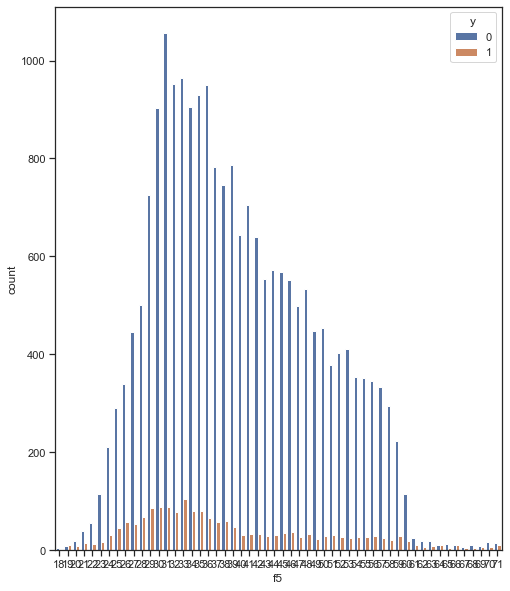

In [227]:
sns.countplot(hue = 'y', x = 'f5', data = target)
discretized = pd.qcut(target['f5'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
target.insert(target.columns.get_loc('f5'), "f5_dis", discretized)

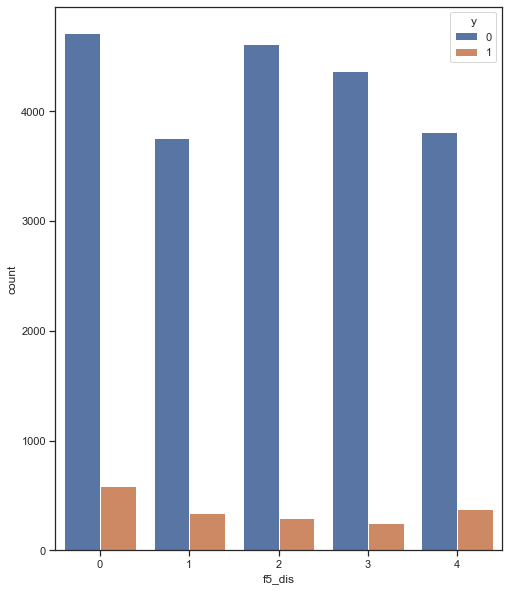

In [228]:
sns.countplot(hue = 'y', x = 'f5_dis', data = target)
target =target.drop('f5', axis=1)

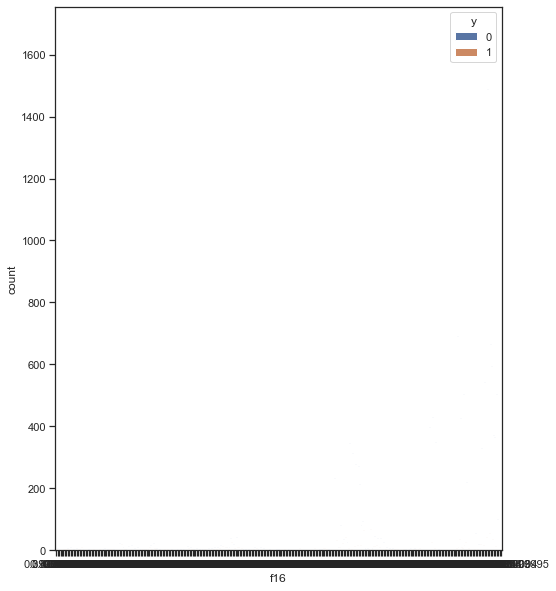

In [229]:
skewed = ['f6', 'f7', 'f9', 'f11']
less_meaningful = ['f13', 'f14', 'f15']
sns.countplot(hue = 'y', x = 'f16', data = target)


Best alpha using built-in LassoCV: 0.020633
Best score using built-in LassoCV: 0.236597
Lasso picked 5 variables and eliminated the other 14 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

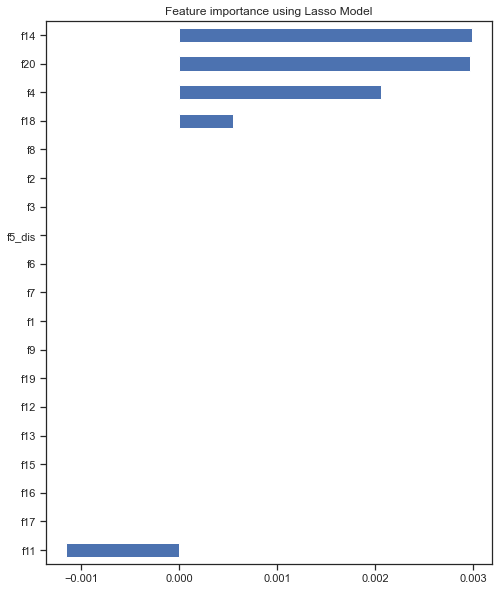

In [230]:
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
X = target.drop('y', axis =1)
y = target.y
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


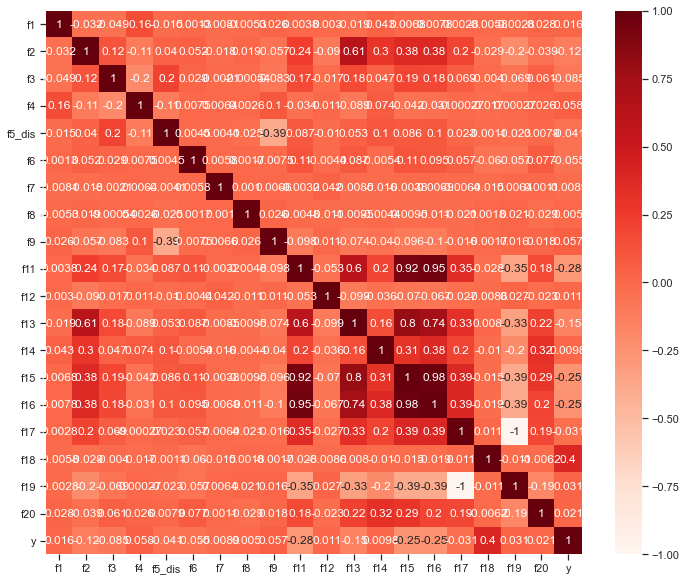

In [231]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = target.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [232]:
import statsmodels.api as sm
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['f2', 'f3', 'f4', 'f9', 'f11', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']


In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))


In [234]:
lasso = ['f14', 'f20', 'f4', 'f18', 'f11']
backward_elim = ['f1', 'f2', 'f3', 'f4','f5_dis', 'f6', 'f9', 'f11', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']
backward_elim_updated = [ 'f2', 'f3', 'f4','f5_dis', 'f6', 'f9', 'f11', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']

save_y = target['y'].values
# save = target.drop(set(target.columns) - set(selected_features_BE), axis = 1)
save = target[backward_elim_updated]
X = save.values
y = save_y
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.fit_transform(X)
pca = PCA(n_components=len(backward_elim_updated))
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
cnt = 1
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=8)
    cv_results = model_selection.cross_val_score(model, X_train, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}/{}\t{}: {}".format(cnt, len(models), name, cv_results.mean())
    cnt+=1;
    print(msg)

1/3	LR: 0.9268778123918311
2/3	KNN: 0.9214693665628245
3/3	SVM: 0.9286085150571132


In [235]:
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')
val_x = encoder(pd.DataFrame(val_x), ['f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f9', 'f12', 'f17', 'f20'])
discretized = pd.qcut(val_x['f5'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
val_x.insert(val_x.columns.get_loc('f5'), "f5_dis", discretized)
scaler.fit(val_x)
val_x = scaler.fit_transform(val_x)
pca.fit(val_x)
val_x = pca.fit_transform(val_x)
svc = SVC()
svc.fit(X_train, y)
predictions = svc.predict(val_x)
print("Accuracy : ", accuracy_score(val_y, predictions))
print("Confusion Matrix : \n",confusion_matrix(val_y, predictions))
print("Classification Report: \n",classification_report(val_y, predictions))






Accuracy :  0.8666160849772382
Confusion Matrix : 
 [[5702  138]
 [ 741    9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      5840
           1       0.06      0.01      0.02       750

    accuracy                           0.87      6590
   macro avg       0.47      0.49      0.47      6590
weighted avg       0.79      0.87      0.83      6590

